# Individual assignment 2 - BUSA8000 - Techniques in Business Analytics

- **Student name**: Quoc Phong Nguyen
- **Student ID**: 48203971

**Acknowledgement Statement by students:** I acknowledge that I have **only used** GAITs (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment instructions. 

| Field | Description |
|----------------------|---------------------------------------------------------------------------------------------------|
| koala_id | Unique identifier for each koala. Nominal. |
| region | Numeric identifier for the region where the koala was observed. |
| habitat | String variable indicating the state habitat of the koala (QLD or VIC). |
| gender | String variable of the koala's gender (male or female). |
| age_in_years | Positive Integer variable of the koala's age. |
| paw_size | Numeric. The koala's paw size in centimeters. |
| total_length | Numeric. The koala's total body length in centimeters. |
| head_length | Numeric. The koala's head length in centimeters. |
| ear_size | Numeric. The koala's ear size in centimeters. |
| foot_length | Numeric. The koala's foot length in centimeters. |
| skull_width | Numeric. The koala's skull width in centimeters. |
| eye_diameter | Numeric. The koala's eye diameter in centimeters. |
| chest_circumference | Numeric. The koala's chest circumference in centimeters. |
| belly_circumference | Numeric. The koala's belly circumference in centimeters. |

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import skew
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Section 1: Exploratory Data Analysis

In [4]:
# Load the dataset:
koalas = pd.read_excel('koalas_dataset.xlsx')
koalas.head()

,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
0,1,1,VIC,m,8.0,16.0,77.0,19.1,19.5,24.5,15.4,2.2,63.0,61.0
1,2,1,VIC,f,6.0,16.5,79.5,17.5,16.2,22.5,12.6,3.0,63.5,58.0
2,3,1,VIC,f,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0
3,4,1,VIC,f,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0
4,5,1,VIC,f,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0


### Expore the data

In [5]:
# Replace the name of the column "Paw Size"
koalas.rename(columns={'Paw Size': 'paw_size'}, inplace=True)
# Display the shape of the data
koalas.shape

(104, 14)

In [6]:
koalas.describe()

,koala_id,region,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,102.000000,103.000000,104.000000,104.000000,103.000000
mean,52.500000,3.625000,3.833333,17.009615,75.088462,18.554808,22.650000,18.461765,12.917476,5.886538,62.000000,57.582524
std,30.166206,2.349086,1.909244,1.959518,4.310549,9.761017,87.562416,4.416935,11.160491,39.082636,2.045597,2.775150
min,1.000000,1.000000,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,26.750000,1.000000,2.250000,15.875000,72.000000,15.700000,9.875000,14.550000,9.950000,1.400000,60.500000,56.000000
50%,52.500000,3.000000,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,78.250000,6.000000,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.250000
max,104.000000,7.000000,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


- The data has 104 records and 14 columns

In [7]:
# Display the unique values of the data
koalas.nunique()

koala_id               104
region                   7
habitat                  8
gender                   4
age_in_years             9
paw_size                19
total_length            34
head_length             71
ear_size                71
foot_length             74
skull_width             64
eye_diameter            33
chest_circumference     19
belly_circumference     24
dtype: int64

- We might see some incorrect entries in the data, such as gender with 4 unique values. Perhaps other fields also have the same issue. So we will pay attention to this and clean the data.

In [8]:
# Display the information of the data
koalas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   koala_id             104 non-null    int64  
 1   region               104 non-null    int64  
 2   habitat              104 non-null    object 
 3   gender               104 non-null    object 
 4   age_in_years         102 non-null    float64
 5   paw_size             104 non-null    float64
 6   total_length         104 non-null    float64
 7   head_length          104 non-null    float64
 8   ear_size             104 non-null    float64
 9   foot_length          102 non-null    float64
 10  skull_width          103 non-null    float64
 11  eye_diameter         104 non-null    float64
 12  chest_circumference  104 non-null    float64
 13  belly_circumference  103 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


- As the data has 104 records, we can see there is some missing data in columns "age_in_years", "foot_length", "skull_width" and "belly_circumference".

In [9]:
# Summary statistics of the data
koalas.describe(include = 'all')


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,104,104,102.000000,104.000000,104.000000,104.000000,104.000000,102.000000,103.000000,104.000000,104.000000,103.000000
unique,NaN,NaN,8,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,QLD,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,54,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.833333,17.009615,75.088462,18.554808,22.650000,18.461765,12.917476,5.886538,62.000000,57.582524
std,30.166206,2.349086,NaN,NaN,1.909244,1.959518,4.310549,9.761017,87.562416,4.416935,11.160491,39.082636,2.045597,2.775150
min,1.000000,1.000000,NaN,NaN,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,26.750000,1.000000,NaN,NaN,2.250000,15.875000,72.000000,15.700000,9.875000,14.550000,9.950000,1.400000,60.500000,56.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.250000


Given information from the summary table above, we can note that:
- Several measurements show extremely wide ranges that are biologically implausible for koalas, such as `head_length`, `ear_size`,`skull_width`, `eye_diameter`.
- For example, ear size ranges from 5.3 to 900.8 cm, and eye diameter from 0.5 to 400.5 cm.
- These extreme values suggest the presence of significant outliers or data entry errors.


### Handle format and wrong entries

In [10]:
# Check the values of `region`
koalas['region'].value_counts()

region
1    33
7    18
2    13
5    13
6    13
3     7
4     7
Name: count, dtype: int64

In [11]:
# Check the values of `habitat`
koalas['habitat'].value_counts()

habitat
QLD           54
VIC           44
VICtoria       1
Vic            1
Queensland     1
Queenstown     1
qld            1
q              1
Name: count, dtype: int64

**Comment:** The results above indicate the the column of `habitat` has several inconsistent entries

In [12]:
# Fix the `habitat` column
habitat_correction = {'Queensland':'QLD', 'qld':'QLD', 'Queenstown':'QLD', 'q':'QLD', 'VICtoria':'VIC', 'Vic':'VIC'}
koalas['habitat'] = koalas['habitat'].replace(habitat_correction)
koalas['habitat'].value_counts()

habitat
QLD    58
VIC    46
Name: count, dtype: int64

In [13]:
# Check the values of `gender`
koalas['gender'].value_counts()

gender
m         60
f         42
female     1
male       1
Name: count, dtype: int64

**Comment:** The results above indicate the the column of `gender` has several inconsistent entries

In [14]:
# Fix the `gender` column
gender_correction = {'f':'female', 'm':'male'}
koalas['gender'] = koalas['gender'].replace(gender_correction)
koalas['gender'].value_counts()

gender
male      61
female    43
Name: count, dtype: int64

### Handle missing values


In [15]:
# Check for missing values
koalas.isnull().sum()

koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           2
paw_size               0
total_length           0
head_length            0
ear_size               0
foot_length            2
skull_width            1
eye_diameter           0
chest_circumference    0
belly_circumference    1
dtype: int64

- We can see there are missing values in columns `age_in_years`, `foot_length`, `skull_width` and `belly_circumference`.
- To handle these missing values, we will use median imputation. We choose the median instead of the mean because we noticed some extreme values in our earlier descriptive statistics, which might indicate the presence of outliers. 
- The median is less affected by these potential outliers, making it a more suitable choice for imputation in this case.

In [16]:
# Impute missing values with median for each column
columns_with_missing = ['age_in_years', 'foot_length', 'skull_width', 'belly_circumference']

for column in columns_with_missing:
    median_value = koalas[column].median()
    print(f"Median value for {column}: {median_value}")
    koalas[column].fillna(median_value, inplace=True)

# Check that missing values have been handled
print ('\nMissing values after imputation:')
koalas.isnull().sum()


Median value for age_in_years: 3.0
Median value for foot_length: 17.95
Median value for skull_width: 11.3
Median value for belly_circumference: 57.5

Missing values after imputation:


koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           0
paw_size               0
total_length           0
head_length            0
ear_size               0
foot_length            0
skull_width            0
eye_diameter           0
chest_circumference    0
belly_circumference    0
dtype: int64

In [17]:
# Check the duplicate records by `koala_id``, `region`, `habitat`
duplicates = koalas[koalas.duplicated(subset=['koala_id', 'region', 'habitat'], keep=False)]
duplicates


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference


- There is no duplicate record in our dataset

### Data distribution and outliers treatment

In [18]:
koalas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   koala_id             104 non-null    int64  
 1   region               104 non-null    int64  
 2   habitat              104 non-null    object 
 3   gender               104 non-null    object 
 4   age_in_years         104 non-null    float64
 5   paw_size             104 non-null    float64
 6   total_length         104 non-null    float64
 7   head_length          104 non-null    float64
 8   ear_size             104 non-null    float64
 9   foot_length          104 non-null    float64
 10  skull_width          104 non-null    float64
 11  eye_diameter         104 non-null    float64
 12  chest_circumference  104 non-null    float64
 13  belly_circumference  104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


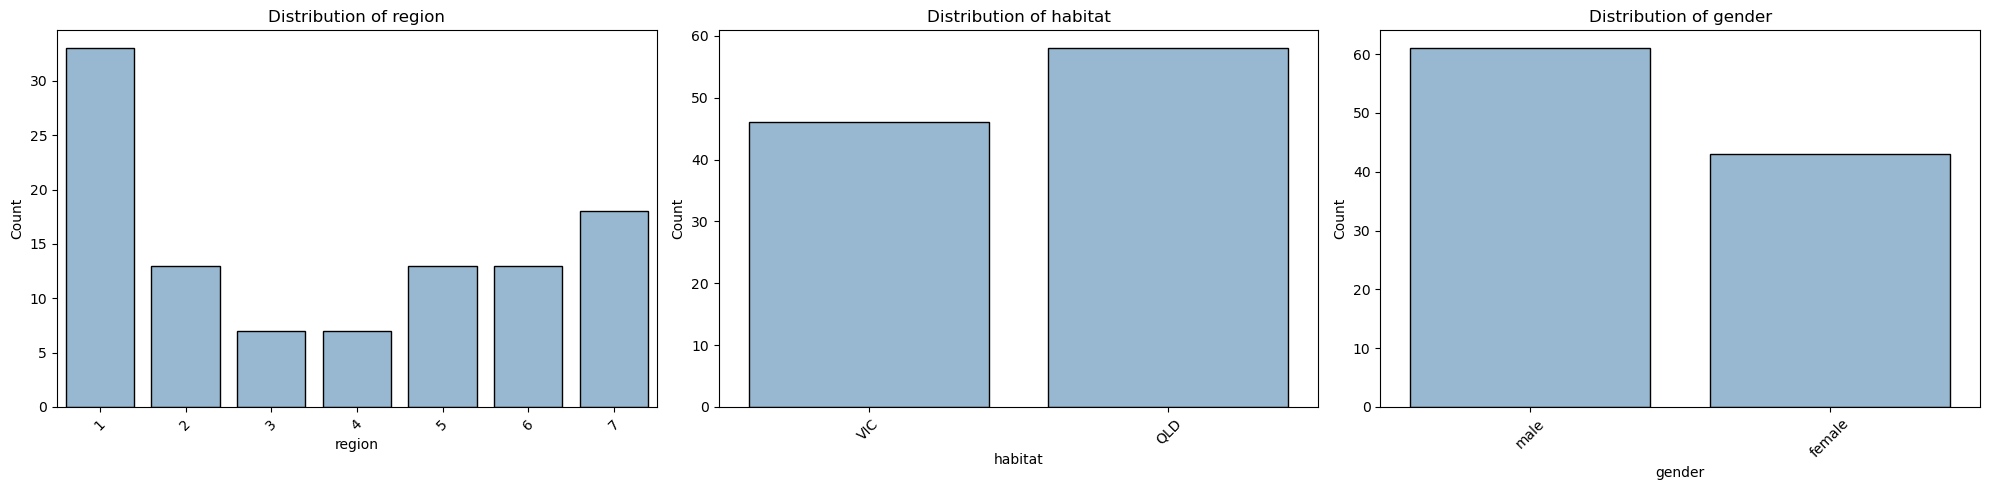

In [19]:
# Define the categorical columns in the dataset
categorical_columns = ['region', 'habitat', 'gender']

# We build bar plots for categorical columns to check the frequency of each category
plt.figure(figsize=(20, 5))

for i, column in enumerate(categorical_columns,1):
    plt.subplot(1, 3, i)
    sns.countplot(data=koalas, x=column, color = '#8ebad9', edgecolor = 'black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


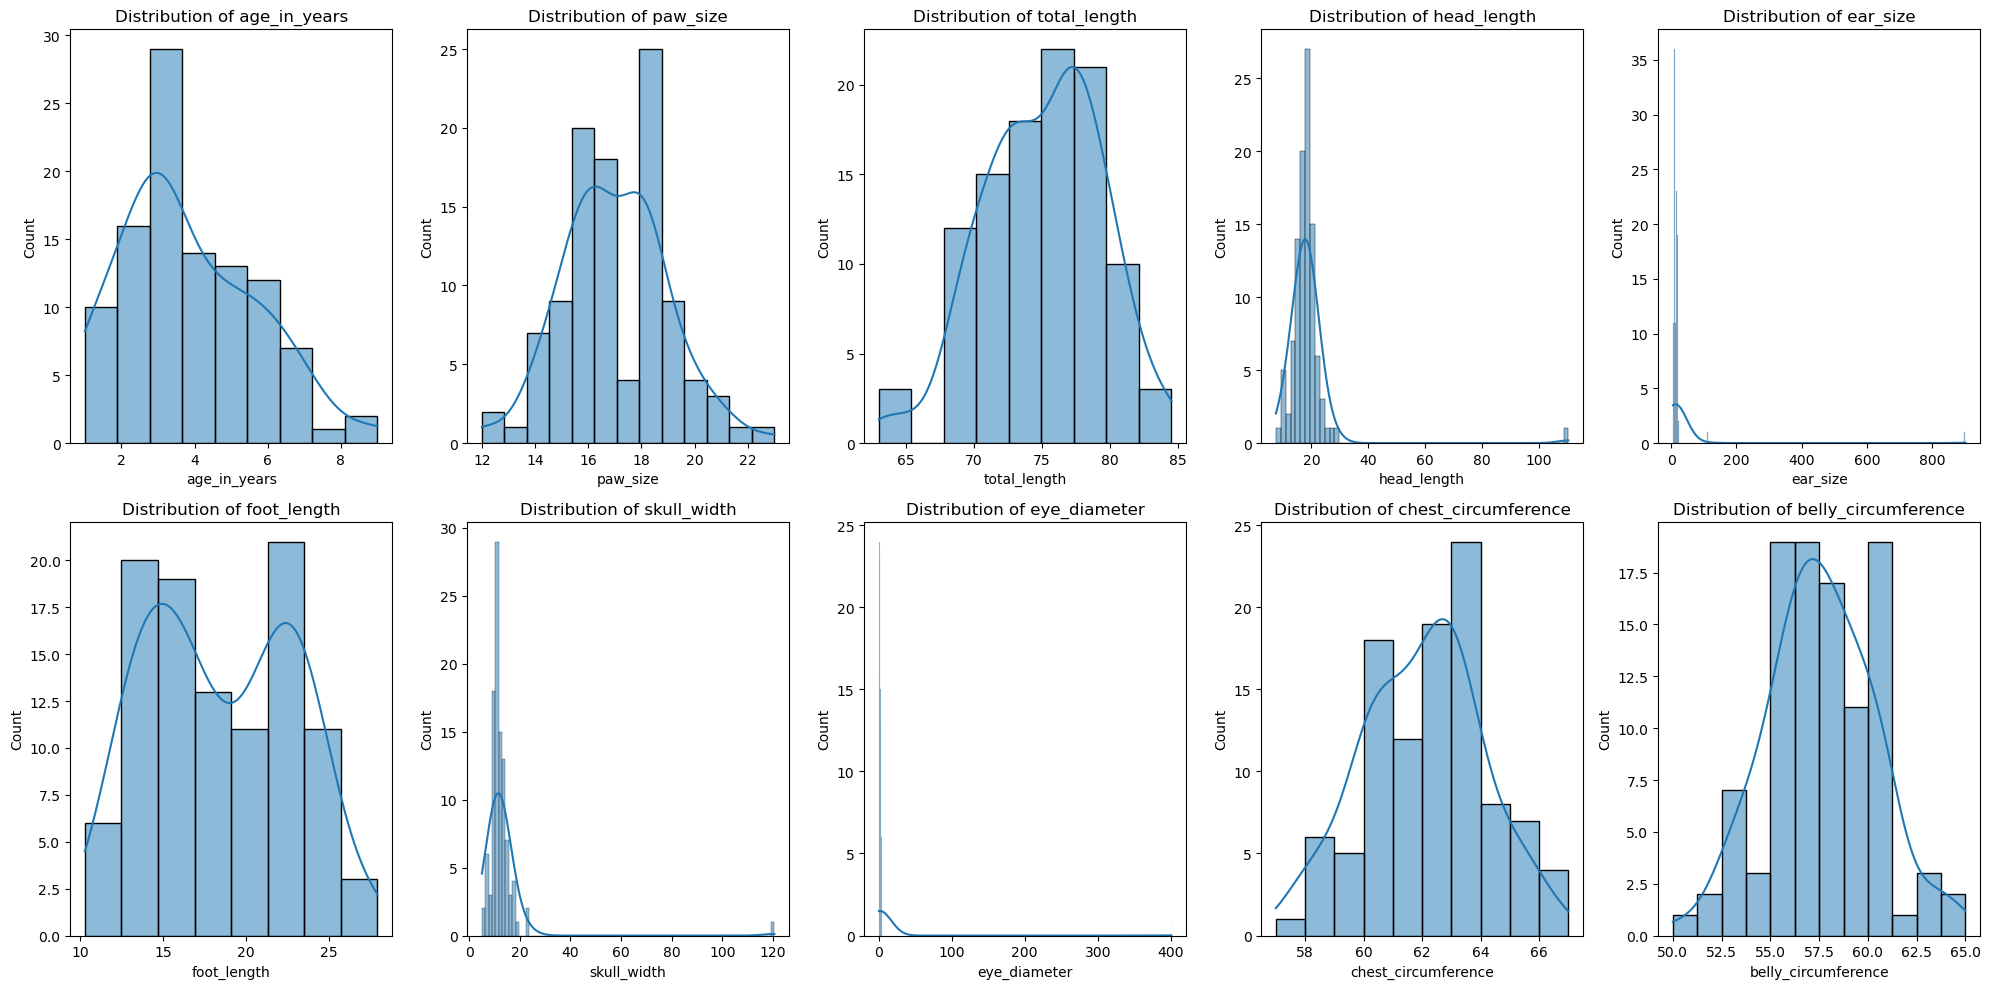

In [20]:
# Define the numerical columns in the dataset
numerical_columns = ['age_in_years', 'paw_size', 'total_length', 'head_length', 
                     'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 
                     'chest_circumference', 'belly_circumference']

# We will build histograms to check the distribution of numerical columns
plt.figure(figsize=(20, 10))


for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.histplot(koalas[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

# for i, column in enumerate(numerical_columns, 1):
#     plt.subplot(2, 5, i)
#     sns.histplot(data=koalas, x=column, kde=True, edgecolor = 'black')
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')

plt.tight_layout()
plt.show()    

In [21]:
# Calculate the skewness of the numerical columns
for col in numerical_columns:
    skewness = round(skew(koalas[col]), 2)
    print(f'Skewness of {col}: {skewness}')

Skewness of age_in_years: 0.56
Skewness of paw_size: 0.17
Skewness of total_length: -0.28
Skewness of head_length: 8.11
Skewness of ear_size: 9.85
Skewness of foot_length: 0.1
Skewness of skull_width: 8.89
Skewness of eye_diameter: 10.04
Skewness of chest_circumference: -0.05
Skewness of belly_circumference: 0.08


- The preliminary calculation of skewness indicates that there are some factors with highly skewed distribution, which is less than -1 or greater than 1:
    + head_length: 8.11
    + ear_size: 9.85
    + skull_width: 8.89
    + eye_diameter: 10.04
- This result might be due to the presence of outliers in the dataset, we will try to detect and fix outlier issues then re-assess the skewness.

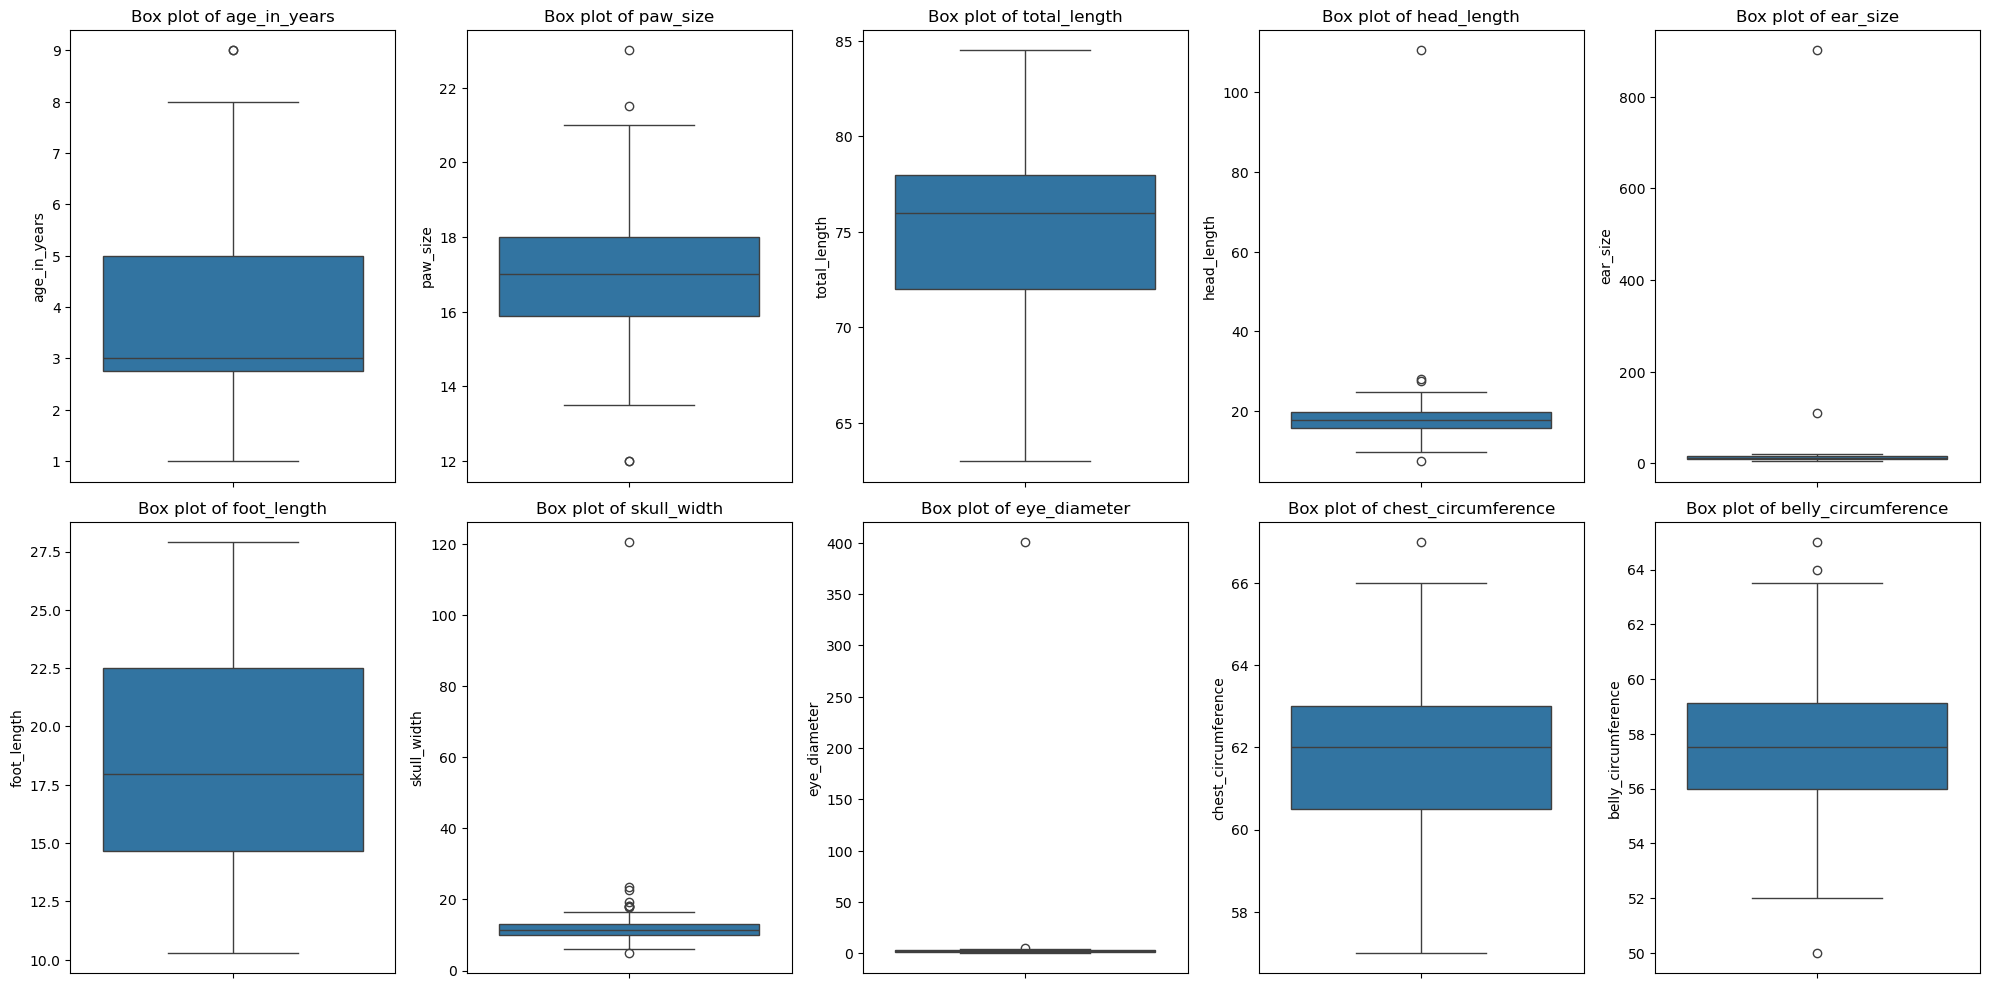

,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.817308,17.009615,75.088462,18.554808,22.650000,18.451923,12.901923,5.886538,62.000000,57.581731
std,1.894112,1.959518,4.310549,9.761017,87.562416,4.374412,11.107314,39.082636,2.045597,2.761657
min,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,2.750000,15.875000,72.000000,15.700000,9.875000,14.650000,9.975000,1.400000,60.500000,56.000000
50%,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.125000
max,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


In [22]:
# Build box plots for numerical columns
plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=koalas, y=column)
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

koalas[numerical_columns].describe()

Based on the results of box plots and histograms:
- We notice outliers appearing in variables like head_length, ear_size, skull_width, and eye_diameter. Notably, some extreme values can be observed in these variables, which is consistent with our findings in the histograms:

    - The `head_length` variable shows several outliers above 20 cm, with the most extreme value reaching 110.5 cm. These outliers are separated from the main distribution in both the box plot and histogram.

    - `Ear_size` demonstrates the most severe outlier issue, with an extreme value of 900.8 cm. This outlier is so far different from the rest of the distribution that it is barely visible in the histogram. This result may be measurement or data entry mistakes rather than genuine observations.

    - `Skull_width` also exhibits extreme outliers, with values extending up to 120.6 cm. The histogram confirms that these outliers are isolated from the main distribution, which is tightly clustered below 20 cm. This pattern suggests potential measurement errors for these records.

    - `Eye_diameter` has a similar problem to ear_size, with an extreme outlier at 400.5 cm. The histogram also shows this value is completely detached from the main distribution, concentrated near zero. Both plots for this variable confirm the presence of outliers. 

- As for variables such as `age_in_years`, `paw_size`, `chest_circumference`, and `belly_circumference`, they also have some outliers, but their values are less extreme and might be due to natural variation in the koala population. 
    - For instance, the outliers in `age_in_years` could represent unusually old koalas in the sample. The outliers in belly_circumference might indicate pregnant females or individuals with better access to food. `Paw_size` outliers could be attributed to natural variations in koala size or age. 
    - These milder outliers should be considered in analyses but may not necessarily need to be removed from the dataset as they likely represent valid biological variation within the koala population.


In [23]:
# Define the function to sort the outliers
def sort_outliers(df, column):
    # Define outliers based on IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return the outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Display the outliers by each numerical column
for column in numerical_columns:
    outliers = sort_outliers(koalas, column)
    print(f"\nOutliers in {column}:")
    if len(outliers) > 0:
        display(outliers)
    else:
        print("No outliers found.")



Outliers in age_in_years:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
8,9,1,VIC,female,9.0,17.0,79.5,18.4,17.9,22.4,11.3,2.5,63.0,58.0
10,11,1,VIC,female,9.0,19.0,77.5,18.3,16.3,27.2,12.2,1.9,66.0,59.0



Outliers in paw_size:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
41,42,2,VIC,male,3.0,12.0,65.0,10.3,16.2,12.7,9.1,0.8,60.5,58.0
42,43,2,VIC,female,2.0,12.0,69.0,15.0,14.4,22.0,10.5,0.6,64.0,56.0
53,54,4,QLD,male,7.0,23.0,79.5,21.9,11.0,21.3,18.0,400.5,65.0,61.5
86,87,7,QLD,male,2.0,21.5,81.0,23.5,11.8,21.7,15.7,2.0,61.0,61.0



Outliers in total_length:
No outliers found.

Outliers in head_length:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
54,55,4,QLD,male,2.0,18.0,80.5,28.1,9.9,22.5,18.2,3.4,65.5,61.0
58,59,4,QLD,male,2.0,20.0,84.0,27.5,9.5,23.2,17.8,1.7,67.0,61.0
72,73,5,QLD,male,1.0,16.5,70.0,7.5,9.7,15.7,7.3,3.0,58.5,53.0
77,78,6,QLD,male,1.0,16.5,69.0,110.5,9.3,13.0,6.0,0.7,58.0,53.0



Outliers in ear_size:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
57,58,4,QLD,male,3.0,19.0,79.0,19.5,110.4,16.5,19.2,1.4,65.5,58.0
89,90,7,QLD,male,3.0,18.5,73.0,17.6,900.8,19.8,9.6,1.5,60.5,57.5



Outliers in foot_length:
No outliers found.

Outliers in skull_width:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
14,15,1,VIC,male,5.0,14.0,73.5,17.9,16.8,19.7,120.6,2.7,63.0,60.0
16,17,1,VIC,female,1.0,16.5,77.5,19.7,18.2,23.2,22.7,1.7,64.0,56.0
47,48,3,QLD,male,5.0,14.0,73.0,23.6,9.9,16.9,18.2,4.0,63.0,60.0
53,54,4,QLD,male,7.0,23.0,79.5,21.9,11.0,21.3,18.0,400.5,65.0,61.5
54,55,4,QLD,male,2.0,18.0,80.5,28.1,9.9,22.5,18.2,3.4,65.5,61.0
57,58,4,QLD,male,3.0,19.0,79.0,19.5,110.4,16.5,19.2,1.4,65.5,58.0
58,59,4,QLD,male,2.0,20.0,84.0,27.5,9.5,23.2,17.8,1.7,67.0,61.0
78,79,6,QLD,male,1.0,16.5,69.0,10.8,8.0,12.8,5.0,1.8,57.0,53.5
97,98,7,QLD,male,5.0,15.0,72.0,18.2,9.3,15.6,23.6,1.5,63.5,57.0



Outliers in eye_diameter:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
53,54,4,QLD,male,7.0,23.0,79.5,21.9,11.0,21.3,18.0,400.5,65.0,61.5
75,76,6,QLD,male,5.0,21.0,77.0,17.4,11.4,14.5,11.8,4.8,61.0,57.5



Outliers in chest_circumference:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
58,59,4,QLD,male,2.0,20.0,84.0,27.5,9.5,23.2,17.8,1.7,67.0,61.0



Outliers in belly_circumference:


,koala_id,region,habitat,gender,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
20,21,1,VIC,female,3.0,19.5,84.5,20.9,17.9,27.9,13.1,1.2,65.0,65.0
38,39,2,VIC,female,1.0,14.0,63.0,9.7,18.4,18.7,6.5,0.5,60.0,50.0
56,57,4,QLD,female,4.0,21.0,81.0,20.1,10.3,17.2,14.4,1.5,66.0,64.0


After careful consideration of outliers in detail rows, we have decided on the following points:

- For `age_in_years` and `paw_size`, we will keep the outliers. The diversity in age could be due to the sample collection process, while variations in paw size might represent natural differences among koalas.

- Variables such as `head_length`, `ear_size`, `skull_width`, and `eye_diameter` are previously noted to have extreme values that deviate significantly from their general distributions. We have decided to replace these outliers with the median values of their respective variables. We use the median rather than the mean because the distributions of these columns are highly skewed, and the median provides a more accurate representation of the central tendency in such cases.

- Regarding `chest_circumference`, we will keep the outliers as they are. The differences in the overall distribution are not too extreme and might represent the natural diversity of the koalas.

- For `belly_circumference`, we have decided to keep the outliers after examining the records. We found that all the outliers in this variable are females. Those aged 3 and 4 may be pregnant, while the outlier at one year of age could be a young koala still growing.

This approach allows us to address the most extreme outliers that are likely due to errors while preserving natural variation in the dataset where it is biologically plausible.

In [24]:
# Define columns to replace outliers
columns_to_replace = ['head_length', 'ear_size', 'skull_width', 'eye_diameter']

# Define the function to replace outliers with median
def replace_outliers_with_median(df, column):
    median_value = df[column].median()
    # Define outlier thresholds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with median
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    return df

# Replace outliers in specified columns
for column in columns_to_replace:
    koalas = replace_outliers_with_median(koalas, column)

print("Outliers in specified columns have been replaced with their respective median values.")
print("---------------------------------------------------------------------------------")

koalas[numerical_columns].describe()

Outliers in specified columns have been replaced with their respective median values.
---------------------------------------------------------------------------------


,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.817308,17.009615,75.088462,17.572115,13.155769,18.451923,11.348077,2.025962,62.000000,57.581731
std,1.894112,1.959518,4.310549,3.065434,4.096217,4.374412,2.117426,0.926419,2.045597,2.761657
min,1.000000,12.000000,63.000000,9.700000,5.300000,10.300000,6.000000,0.500000,57.000000,50.000000
25%,2.750000,15.875000,72.000000,15.925000,9.875000,14.650000,10.000000,1.400000,60.500000,56.000000
50%,3.000000,17.000000,76.000000,17.850000,11.850000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,5.000000,18.000000,78.000000,19.425000,17.000000,22.500000,12.600000,2.550000,63.000000,59.125000
max,9.000000,23.000000,84.500000,24.900000,21.200000,27.900000,16.500000,4.400000,67.000000,65.000000


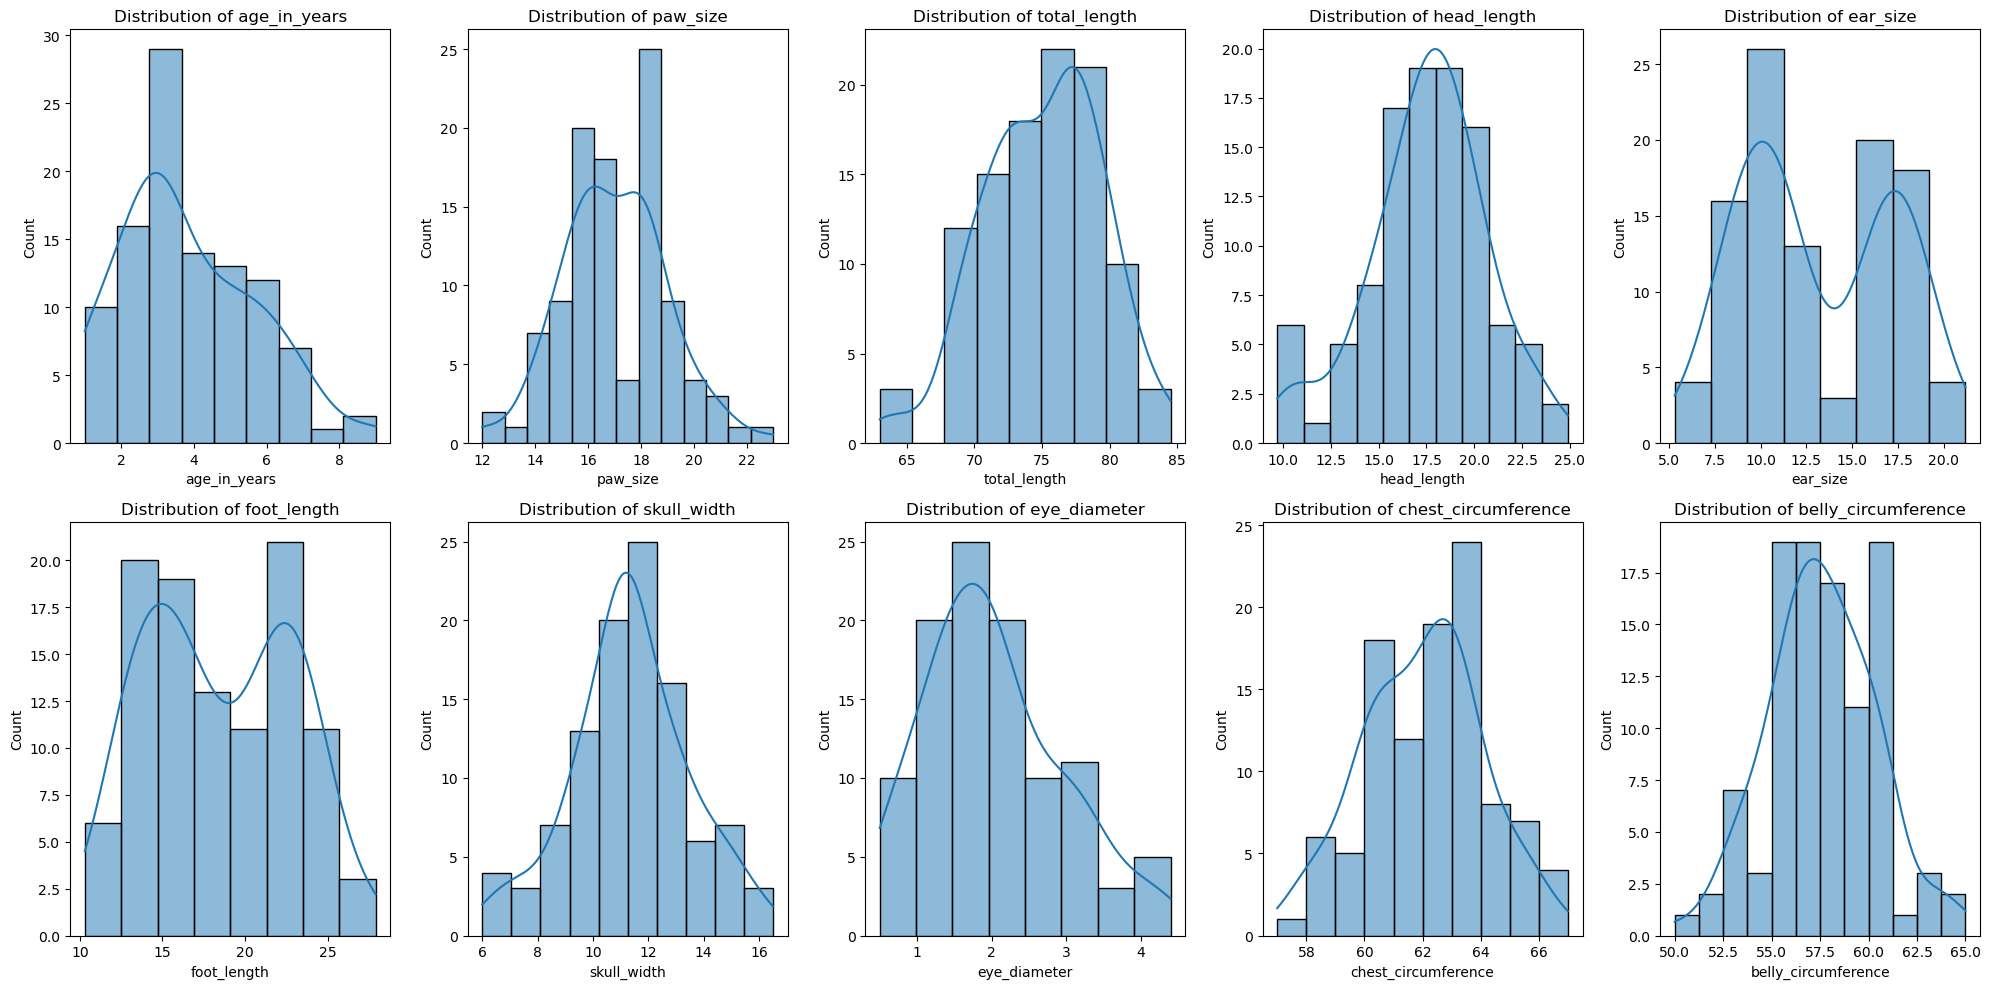

In [25]:
# Visualize the distributions after outlier treatment
plt.figure(figsize=(20, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.histplot(koalas[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [26]:
# Re-check the skewness of the numerical columns
print ("\nSkewness after outlier treatment:")
for col in numerical_columns:
    skewness = round(skew(koalas[col]), 2)
    print(f'Skewness of {col}: {skewness}')



Skewness after outlier treatment:
Skewness of age_in_years: 0.56
Skewness of paw_size: 0.17
Skewness of total_length: -0.28
Skewness of head_length: -0.35
Skewness of ear_size: 0.14
Skewness of foot_length: 0.1
Skewness of skull_width: -0.06
Skewness of eye_diameter: 0.57
Skewness of chest_circumference: -0.05
Skewness of belly_circumference: 0.08


- After handling outliers, the skewness of most variables has significantly improved. These values are now ranging from around -0.5 to 0.5.
- The previously problematic variables (`head_length`, `ear_size`, `skull_width`, and `eye_diameter`) are successfully addressed, with their skewness values now within acceptable ranges.
- Only `age_in_years` (0.56) and `eye_diameter` (0.57) show mild positive skewness, which is generally acceptable and may not require further transformation.

## Section 2: Data visualisation

In [27]:
koalas.nunique()

koala_id               104
region                   7
habitat                  2
gender                   2
age_in_years             9
paw_size                19
total_length            34
head_length             68
ear_size                70
foot_length             75
skull_width             56
eye_diameter            31
chest_circumference     19
belly_circumference     24
dtype: int64

### Insight 1: Koala Body Proportions and Gender Differences

In studying koalas, understanding their physical characteristics is crucial for assessing their health, adaptations, and overall well-being. One particularly interesting aspect of the koala study is how the sizes of different body parts—such as the head and feet—compare to their overall body length. These relationships can vary as koalas grow and may differ between males and females. To explore this, we focused on two key measurements: the ratio of head length to total body length, and the ratio of foot length to total body length.

These ratios can provide valuable insights into the koalas' adaptations to their tree-dwelling lifestyle. For instance, the head-to-body ratio might reflect adaptations for feeding on tough eucalyptus leaves (Australian Koala Foundation, 2020), while the foot-to-body ratio could indicate climbing efficiency. By examining how these ratios change with overall body length and comparing them between genders, we can uncover patterns that might not be apparent from individual measurements alone.

To visualize this data effectively, we employed a combination of scatter plots and box plots. The scatter plots show how the body proportion ratios change as koalas increase in total length, with points coloured to distinguish between males and females. This allows us to see trends across the full range of koala sizes. The box plots, on the other hand, display the distribution of these ratios for each gender, providing a clear statistical summary of any differences.


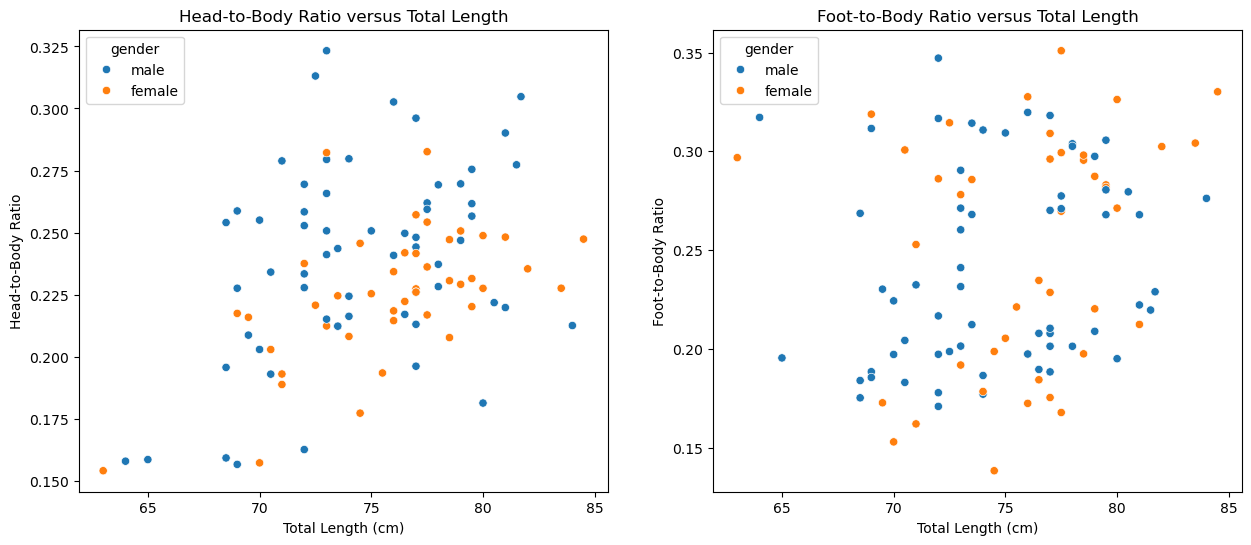

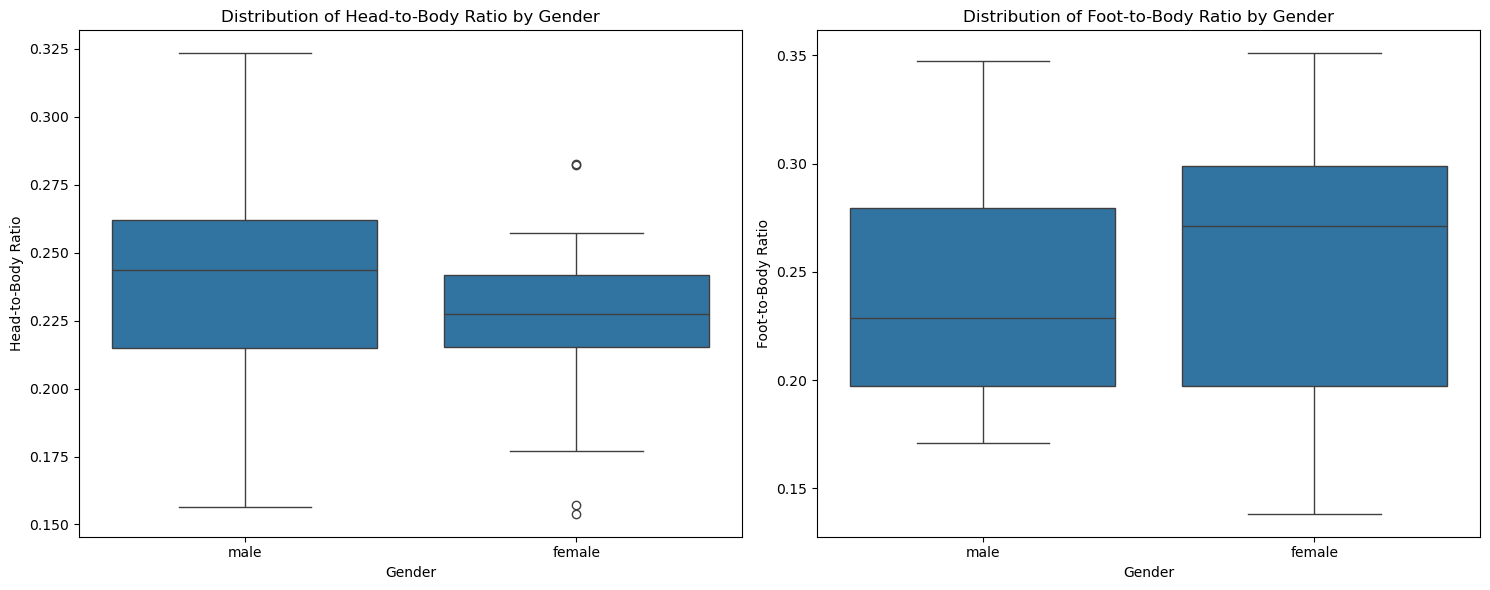

In [28]:
# Calculate body proportion ratios
koalas['head_body_ratio'] = koalas['head_length'] / koalas['total_length']
koalas['foot_body_ratio'] = koalas['foot_length'] / koalas['total_length']

# Create scatter plots for body proportions by gender
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=koalas, 
                x='total_length', y='head_body_ratio', 
                hue='gender')
plt.title('Head-to-Body Ratio versus Total Length')
plt.xlabel('Total Length (cm)')
plt.ylabel('Head-to-Body Ratio')

plt.subplot(1, 2, 2)
sns.scatterplot(data=koalas, 
                x='total_length', y='foot_body_ratio', 
                hue='gender')
plt.title('Foot-to-Body Ratio versus Total Length')
plt.xlabel('Total Length (cm)')
plt.ylabel('Foot-to-Body Ratio')


# Create box plots for body proportions by gender
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=koalas, 
            x='gender', y='head_body_ratio')
plt.title('Distribution of Head-to-Body Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Head-to-Body Ratio')

plt.subplot(1, 2, 2)
sns.boxplot(data=koalas, 
            x='gender', y='foot_body_ratio')
plt.title('Distribution of Foot-to-Body Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Foot-to-Body Ratio')

plt.tight_layout()
plt.show()

Based on the plots above, there are some findings as follows:

- The scatter plots and box plots provide valuable insights into the body proportions of koalas and how they differ between males and females. 

- When looking at the head-to-body ratio, we can observe a slight tendency for this ratio to increase as the total length of the koala increases, suggesting that larger koalas may have proportionally larger heads. Interestingly, male koalas appear to have a slightly higher head-to-body ratio on average than females, as shown by the higher median in the box plot. This could potentially be related to differences in feeding habits or behaviours between genders.

- When we look at the foot-to-body ratio, we notice a different pattern. There seems to be more variation in this ratio across all body sizes, with no clear trend as total length increases. However, the box plot shows that female koalas generally have a slightly higher foot-to-body ratio compared to males. This subtle difference could suggest an adaptation that gives female koalas better climbing abilities, which may be especially helpful when they are caring for their young.

- It is important to note that while gender differences are observable, there is considerable overlap in the distributions for both genders. This suggests that while there are average differences between males and females, individual variation plays a significant role in koala body proportions. The scatter plots also reveal that koalas with similar total lengths can have quite different body proportions, highlighting the diversity within the species.

### Insight 2: Relationship between Chest Circumference and Belly Circumference


The next aspect of the koala study that we want to visualize is the relationship between chest and belly circumferences. This comparison can provide valuable information about koala body shape, potential gender differences, and how body proportions might change with age.

First, we divided the 'age_in_years' variable into three categories: 1-3 years, 4-6 years, and 7-9 years to create age groups. This helps us study how body shape changes as koalas transition from young adults to mature individuals. We selected these age ranges to create evenly spaced groups in terms of years, while still capturing meaningful differences between life stages. However, we should also note that the number of observations in each group may not be evenly distributed due to limited sample sizes.

We chose to use a scatter plot as our main visualization, showing chest circumference against belly circumference. To make the plot more informative, we used different coloured markers to distinguish between genders and varied the size of the points to represent various age groups. This allows us to see how chest and belly circumferences are related, how this relationship might differ between males and females, and how it might change as koalas age.

To provide a more focused view of gender differences, we calculated the belly-to-chest circumference ratio for each koala and visualized the distribution using a box plot, separated by gender. This additional plot helps us identify any significant differences in body shape between male and female koalas, regardless of overall size.

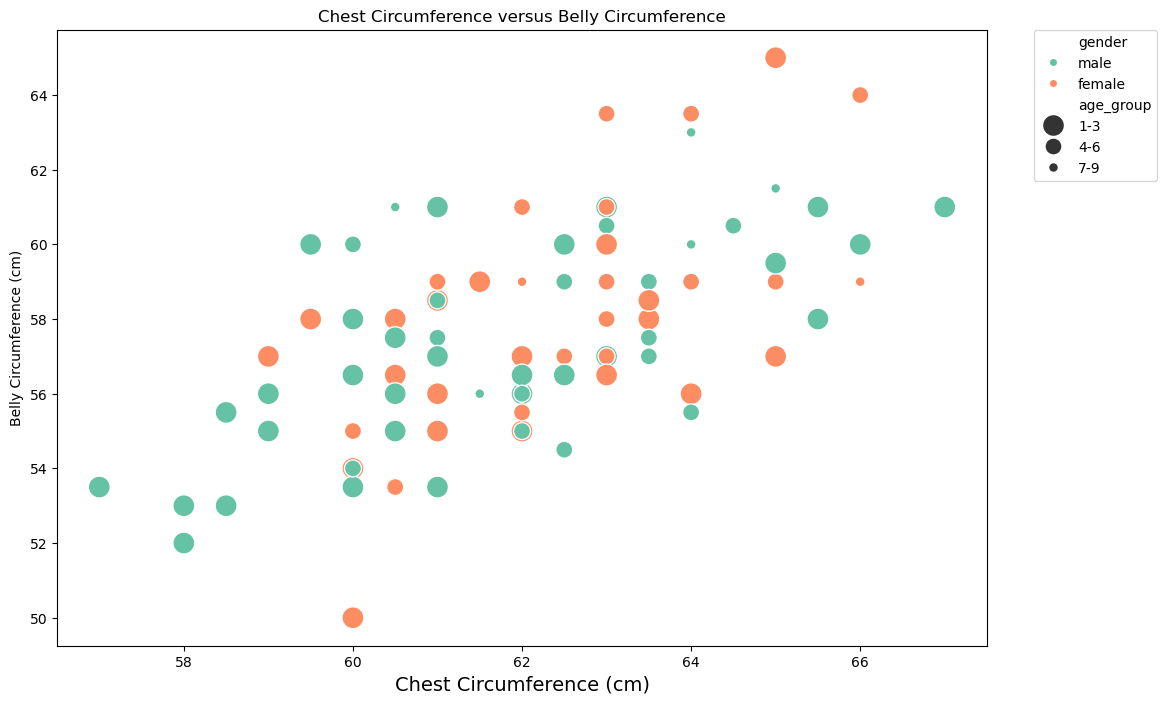

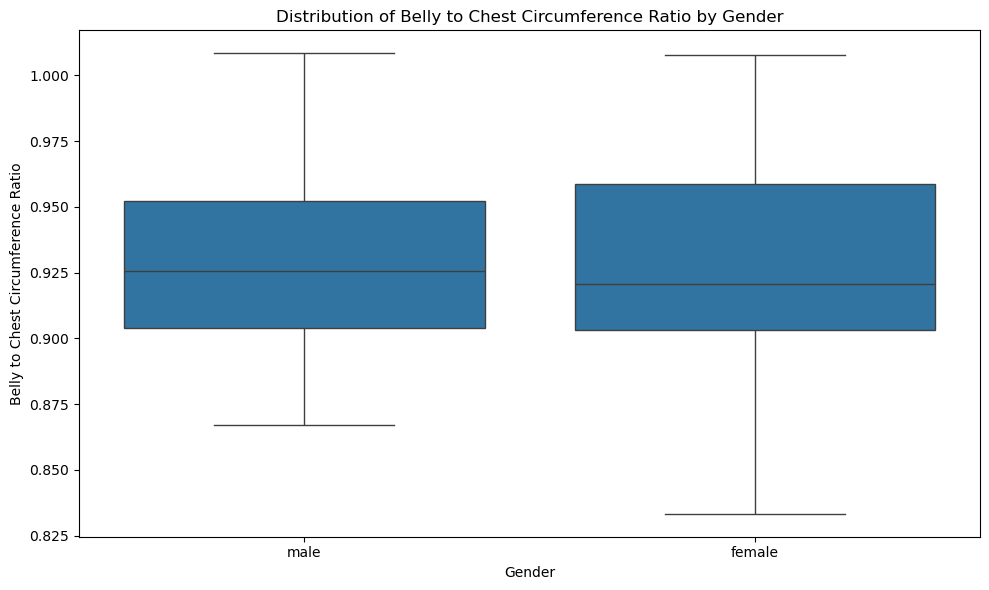

In [29]:
# Create age groups for koalas
koalas['age_group'] = pd.cut(koalas['age_in_years'], 
                             bins=[0, 3, 6, 9], 
                             labels=['1-3', '4-6', '7-9'], 
                             include_lowest=True)

# Create scatter plot for chest circumference vs belly circumference by gender and age group
plt.figure(figsize=(12, 8))
sns.scatterplot(data=koalas, x='chest_circumference', y='belly_circumference', 
                hue='gender', size='age_group', 
                sizes=(50, 250), palette='Set2', 
                legend='full')
plt.title('Chest Circumference versus Belly Circumference')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) # Set the legend outside the plot
plt.xlabel('Chest Circumference (cm)', size = 14)
plt.ylabel('Belly Circumference (cm)')


# Calculate the ratio of belly to chest circumference
koalas['belly_chest_ratio'] = koalas['belly_circumference'] / koalas['chest_circumference']

# Create box plot for belly to chest circumference ratio by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=koalas, 
            x='gender', y='belly_chest_ratio')
plt.title('Distribution of Belly to Chest Circumference Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Belly to Chest Circumference Ratio')

plt.tight_layout()
plt.show()

In [30]:
# Value counts of age_group
koalas['age_group'].value_counts()


age_group
1-3    55
4-6    39
7-9    10
Name: count, dtype: int64

In [31]:
# Summarize belly_chest_ratio by gender
koalas.groupby('gender')['belly_chest_ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,43.0,0.928546,0.037792,0.833333,0.903201,0.920635,0.958847,1.007937
male,61.0,0.929069,0.034282,0.867188,0.904000,0.925620,0.952381,1.008403


In [32]:
# chest circumference and belly circumference by age group
koalas.groupby('age_group')[['chest_circumference', 'belly_circumference']].describe()


chest_circumference                                                \
                        count       mean       std   min   25%   50%    75%   
age_group                                                                     
1-3                      55.0  61.427273  2.314244  57.0  60.0  61.0  63.00   
4-6                      39.0  62.525641  1.409314  60.0  62.0  63.0  63.25   
7-9                      10.0  63.100000  1.679947  60.5  62.0  63.0  64.00   

                belly_circumference                                          \
            max               count       mean       std   min    25%   50%   
age_group                                                                     
1-3        67.0                55.0  56.809091  2.730980  50.0  55.25  56.5   
4-6        66.0                39.0  58.217949  2.548980  53.5  57.00  58.0   
7-9        66.0                10.0  59.350000  2.494995  55.0  58.25  59.5   

                       
            75%   max  
age_group              
1-3        58.0  65.0  
4-6        60.0  64.0  
7-9        61.0  63.0

We can draw some findings from the two plots above as follows:
- The scatter plot and box plot together provide valuable insights into the relationship between chest and belly circumferences in koalas and how this relationship varies by gender and age. 

- The scatter plot reveals a clear positive correlation between chest and belly circumference, which is expected as larger koalas tend to have larger measurements overall. However, the relationship is not perfectly linear, indicating some variation in body shapes among individuals.

- The scatter plot indicates that female koalas, represented by orange dots, tend to have slightly larger belly circumferences relative to their chest circumferences compared to males, especially in the middle and upper ranges of chest circumference. However, the box plot shows that males actually have a slightly higher median belly-to-chest circumference ratio than females, although the difference is minimal. The box plot also clearly demonstrates that females have greater variability in this ratio, as shown by the larger overall range and longer whiskers, especially on the lower end. This variability in females could indicate more diverse body shapes, possibly related to different reproductive stages.

- In the scatter plot, dot size indicates koala age groups. Larger dots represent younger koalas (1-3 years), medium dots represent middle-aged koalas (4-6 years), and smaller dots represent older koalas (7-9 years). Generally, older koalas tend to have slightly larger chest and belly circumferences, aligning with expected growth patterns. However, the relationship between age and body proportions is not straightforward, as some younger koalas have larger measurements than older ones. This suggests significant individual variation regardless of age. It is important to note that the unequal sample sizes across age groups may impact these observed patterns.

- The greater variability in female measurements, particularly in belly circumference, could be attributed to physiological differences related to reproduction. Female koalas carry their young in a pouch located on their belly, which may lead to more fluctuation in belly circumference depending on their reproductive status. This could explain why some female koalas have notably larger belly circumferences relative to their chest size.

## Section 3: Analysis

### Question 1: Is the mean head length of the Koalas significantly different from 92.0 mm?

- To conduct hypothesis testing, we need to ensure the assumption of normality is met. From our previous results, we have a histogram showing an approximately normal distribution for head length, with a skewness value of -0.35, indicating only a slight left skew. 
- Additionally, our sample size is 105, which is large enough in this case. The population variance is unknown, which further supports our choice of test. 
- Therefore, we can confidently proceed with a one-sample t-test to determine if the mean head length of koalas is significantly different from 92.0 mm (9.2 cm).

- State the Null Hypothesis and the Alternative Hypothesis
    - Null Hypothesis (H0): The mean head length of koalas is 92.0 mm (9.2 cm). (μ = 9.2)
    - Alternative Hypothesis (Ha): The mean head length of koalas is different from 92.0 mm (9.2 cm). (μ ≠ 9.2)

In [33]:
# Set the significance level of 0.05 (5%)
alpha = 0.05  

# Perform the t-test and find the p-value
hypothesized_mean = 9.2
t_statistic, p_value = stats.ttest_1samp(koalas['head_length'], hypothesized_mean)

print(f"t-statistic: {t_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

print ("---------------------------------------------------------------------------------")

# Reject or Fail to Reject the Null Hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. The mean head length is significantly different from 9.2 cm.")
else:
    print("Fail to reject the null hypothesis. The data does not provide sufficient evidence that the mean head length is different from 9.2 cm.")

sample_mean = koalas['head_length'].mean()
sample_std = koalas['head_length'].std()
print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample standard deviation: {sample_std:.4f}")

t-statistic: 27.852
p-value: 0.000
---------------------------------------------------------------------------------
Reject the null hypothesis. The mean head length is significantly different from 9.2 cm.
Sample mean: 17.5721
Sample standard deviation: 3.0654


**Comment**: Based on the above test result, we can confirm that the mean head length of the Koalas is significantly different from 92.0 mm or 9.2 cm at the significance level of 5%.

### Question 2: Do male and female Koalas have significantly different mean head lengths?

- To address question 2, we will use a two-sample t-test. This test is appropriate because we need compare the means of two independent groups (male and female koalas). 
- We have already established that the head length data is approximately normally distributed and our sample sizes are sufficient.

- State the Null Hypothesis and the Alternative Hypothesis
    - Null Hypothesis (H0): The mean head lengths of male and female koalas are equal. (μ_male = μ_female)
    - Alternative Hypothesis (Ha): The mean head lengths of male and female koalas are significantly different. (μ_male ≠ μ_female)

In [34]:
koalas['gender'].value_counts()

gender
male      61
female    43
Name: count, dtype: int64

In [35]:

# Set the significance level of 0.05 (5%)
alpha = 0.05  


# Perform the two-sample t-test and find the p-value
male_head_lengths = koalas[koalas['gender'] == 'male']['head_length']
female_head_lengths = koalas[koalas['gender'] == 'female']['head_length']

t_statistic, p_value = stats.ttest_ind(male_head_lengths, female_head_lengths)

print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.3f}")


print ("---------------------------------------------------------------------------------")
# Reject or Fail to Reject the Null Hypothesis
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between the mean head lengths of male and female koalas.")
else:
    print("Fail to reject the null hypothesis.")
    print("The data does not provide sufficient evidence that the mean head lengths of male and female koalas are significantly different.")


male_mean = male_head_lengths.mean()
male_std = male_head_lengths.std()
female_mean = female_head_lengths.mean()
female_std = female_head_lengths.std()

print(f"\nMale koalas:")
print(f"Sample mean: {male_mean:.4f} cm")
print(f"Sample standard deviation: {male_std:.4f} cm")

print(f"\nFemale koalas:")
print(f"Sample mean: {female_mean:.4f} cm")
print(f"Sample standard deviation: {female_std:.4f} cm")

t-statistic: 1.1846
p-value: 0.239
---------------------------------------------------------------------------------
Fail to reject the null hypothesis.
The data does not provide sufficient evidence that the mean head lengths of male and female koalas are significantly different.

Male koalas:
Sample mean: 17.8705 cm
Sample standard deviation: 3.3573 cm

Female koalas:
Sample mean: 17.1488 cm
Sample standard deviation: 2.5749 cm


**Comment**: Based on the above test result, we can believe that male and female Koalas do not have significantly different mean head lengths at the significance level of 5%.

### Question 3: Can we predict the total length of a Koala based on its head length?

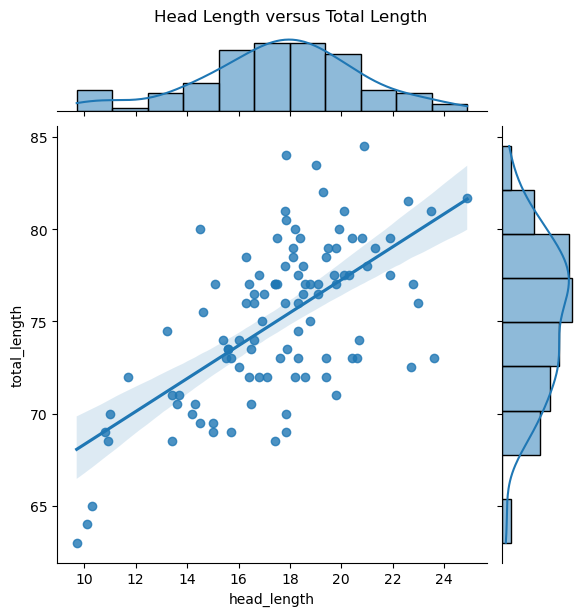

In [36]:
# Build a jointplot to visualize the relationship between total length and head length
sns.jointplot(data=koalas, x='head_length', y='total_length', kind='reg')
plt.suptitle('Head Length versus Total Length', y=1.02)
plt.show()


- We can observe that there is a linear relationship between Head Length and Total Length

In [37]:
# Subset data of "total_length" and "head_length"
subset_data = koalas[['total_length', 'head_length']]

# Build a simple linear regression model to predict total length based on head length
simple_model = ols (formula = 'total_length ~ head_length', data = subset_data)
simple_results = simple_model.fit()
print(simple_results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           4.73e-13
Time:                        23:38:54   Log-Likelihood:                -272.22
No. Observations:                 104   AIC:                             548.4
Df Residuals:                     102   BIC:                             553.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      59.4088      1.919     30.955      

The regression model is statistically significant (F-statistic p-value < 0.05), indicating that head length can be used to predict total length of koalas:
- There is a positive relationship between head length and total length. For every 1 cm increase in head length, we expect the total length to increase by approximately 0.89 cm.
- Our model explains about 40.3% of the variance in total length (R-squared = 0.403). This means that while head length is a useful predictor, other factors also influence a koala's total length.
- Both the intercept and the head length coefficient are statistically significant (p-values < 0.05).
- The regression equation for predicting total length based on head length is: Total Length = 59.4088 + 0.8923 * Head Length.
- While we can predict total length based on head length, the prediction is not perfect, as 59.7% of the variability in total length is not explained by this model.

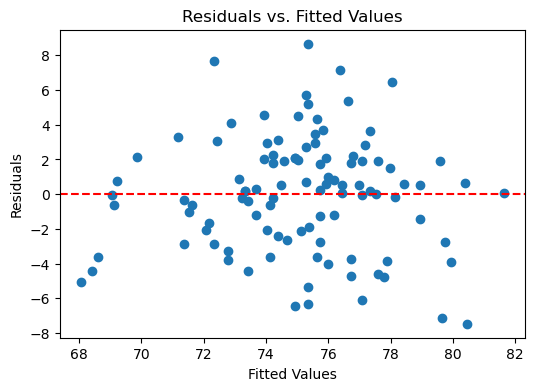

In [38]:
# Check the assumption of Homoscedasticity
# Extract residuals and fitted values
residuals = simple_results.resid
fitted_values = simple_results.fittedvalues

# Plot the residuals against the fitted values
plt.figure(figsize=(6, 4))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

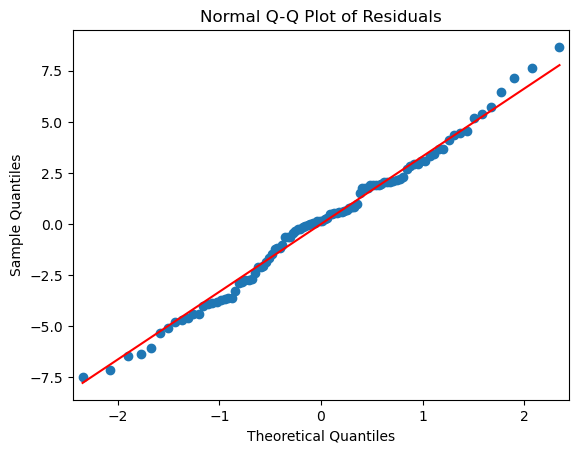

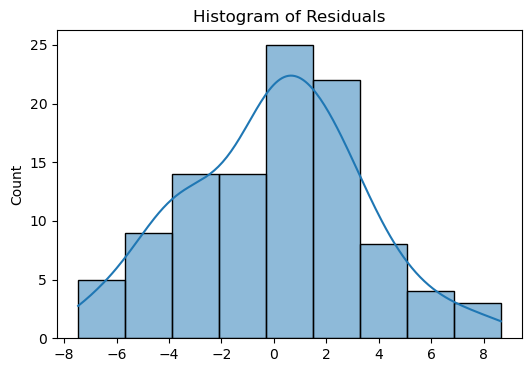

In [39]:
# Check the Normality assumption using QQ plot
sm.qqplot(residuals, line ='s')
plt.title('Normal Q-Q Plot of Residuals')

# Check the Normality assumption using histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()



**Comment**: 
- Based on the above plots, we can see that the residuals are approximately normally distributed, indicating that the normality assumption is met. The assumption of homoscedasticity is also met as the residuals are evenly distributed around the fitted values.
- Therefore, our simple linear regression model is valid and we can use it to predict the total length of a Koala based on its head length.

### Question 4: Can we predict the total length of a Koala based on multiple factors such as head length, skull width, and foot length?

In [40]:
koalas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   koala_id             104 non-null    int64   
 1   region               104 non-null    int64   
 2   habitat              104 non-null    object  
 3   gender               104 non-null    object  
 4   age_in_years         104 non-null    float64 
 5   paw_size             104 non-null    float64 
 6   total_length         104 non-null    float64 
 7   head_length          104 non-null    float64 
 8   ear_size             104 non-null    float64 
 9   foot_length          104 non-null    float64 
 10  skull_width          104 non-null    float64 
 11  eye_diameter         104 non-null    float64 
 12  chest_circumference  104 non-null    float64 
 13  belly_circumference  104 non-null    float64 
 14  head_body_ratio      104 non-null    float64 
 15  foot_body_ratio      10

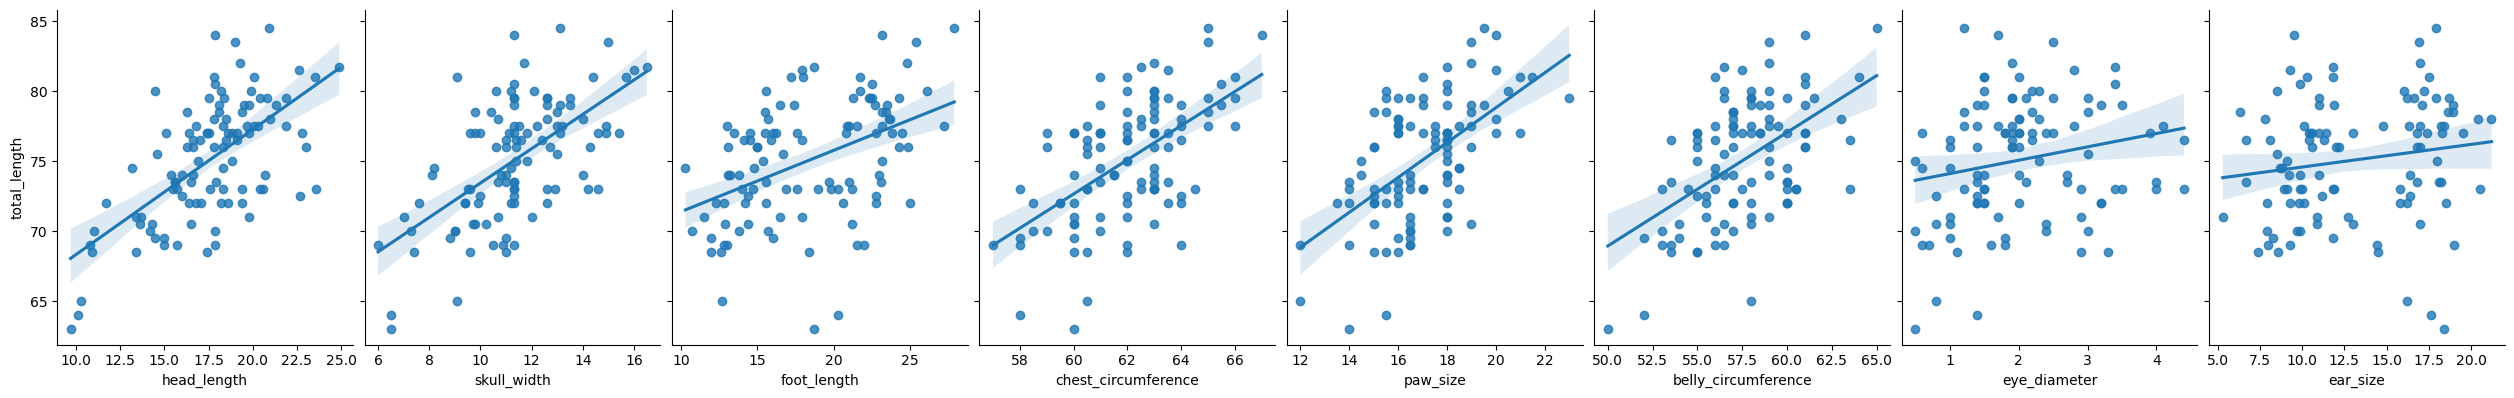

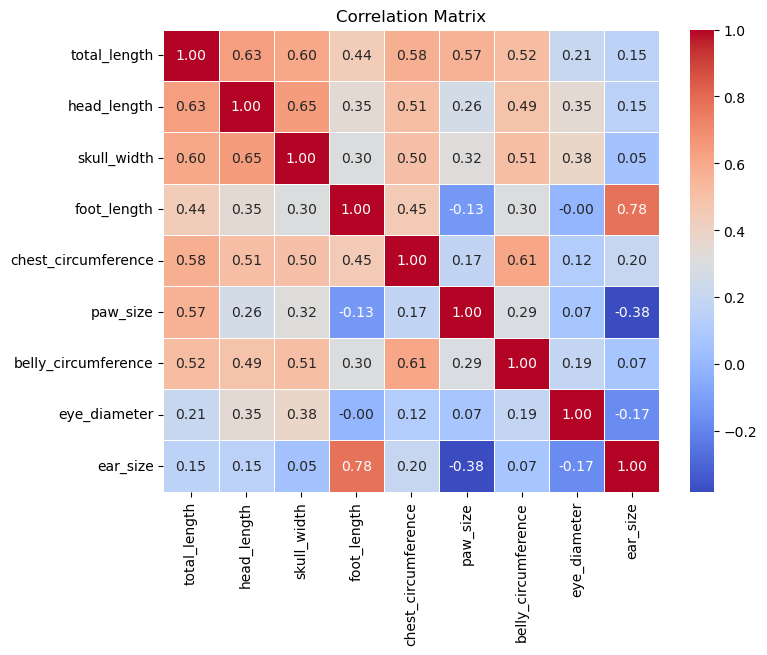

In [41]:
# Subset data of "total_length" and multiple factors which relate to body measurements of koalas
subset_data_multiple = koalas[['total_length', 'head_length', 'skull_width', 'foot_length', 'chest_circumference', 'paw_size', 'belly_circumference', 'eye_diameter', 'ear_size']]

# Pairplot to visualize relationships
sns.pairplot(subset_data_multiple, x_vars=['head_length', 'skull_width', 'foot_length', 'chest_circumference', 'paw_size', 'belly_circumference', 'eye_diameter', 'ear_size'], y_vars='total_length', height=4, aspect=0.8, kind='reg')

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(subset_data_multiple.corr(), annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Comment:**
- The pairplot and correlation heatmap collectively provide insights into the relationships between total length (the target variable) and various body measurements of koalas. Both visualizations confirm positive linear relationships between total length and all predictors, satisfying a key assumption for multiple linear regression.
- Head length shows the strongest correlation with total length (0.63), followed closely by skull width (0.60), chest circumference (0.58), paw size (0.57), and belly circumference (0.52). Weaker correlations are observed for foot length (0.44), eye diameter (0.21), and ear size (0.15). These correlations align with the trends observed in the pair plots, where steeper regression lines indicate stronger relationships.
- The correlation matrix heatmap also reveals several instances of moderate correlations between predictors, particularly between foot length and ear size (0.78), head length and skull width (0.65), and chest circumference and belly circumference (0.61). This suggests some degree of multicollinearity among these predictors, which requires careful investigation. Given these observations, the next step is to calculate Variance Inflation Factors (VIF) to quantify the extent of multicollinearity and determine which predictors should be included in our final regression model to ensure its validity and reliability.



In [42]:
# Define the independent variables and the dependent variable (target)
X = subset_data_multiple.drop(columns=['total_length'])
y = subset_data_multiple['total_length']

# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the VIF data by VIF value in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Display the VIF data
print(vif_data)

               Feature          VIF
0                const  1383.425010
3          foot_length     3.542398
8             ear_size     3.519453
2          skull_width     2.125875
1          head_length     2.056132
4  chest_circumference     2.008412
6  belly_circumference     1.830933
5             paw_size     1.502842
7         eye_diameter     1.343936


Based on the results of VIF calculation above, we can note that:
- These VIF values for the predictor variables are all well below the commonly used threshold of 5 or 10, indicating that multicollinearity is not a significant concern in this model.
- Most VIF values for the predictor variables are below the commonly used threshold of 5, indicating that severe multicollinearity is not a critical issue in this model. However, foot length (3.54) and ear size (3.52) show higher VIFs, suggesting some degree of collinearity between these variables.
- Given these results, we will proceed with building our multiple linear regression model using all predictors then re-assess it again.

In [43]:
# Fit the multiple regression model
model_1 = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     32.37
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           5.96e-24
Time:                        23:38:56   Log-Likelihood:                -230.62
No. Observations:                 104   AIC:                             479.2
Df Residuals:                      95   BIC:                             503.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.5420    

**Comment**:
- The summary indicates that our model 1 can explain 73.2% of the variance in total length (R-squared = 0.732). 
- There are several statistically significant predictors (p < 0.05), with paw size having the strongest effect. 
- However, skull width, belly circumference, eye diameter, and ear size are not significant. Also the high condition number (3.41e+03) suggests potential multicollinearity in this model.
- Given the information about correlation matrix and VIF above, we will exclude from the model some variables due to correlation and potential multicollinearity issues: eye diameter, ear_size, chest_circumference, belly_circumference.
- We will re-implement regression based on the adjusted data and model.

In [44]:
#  Adjusted subset data of "total_length" and multiple factors which relate to body measurements of koalas
adjusted_subset_data = koalas[['total_length', 'head_length', 'skull_width', 'foot_length', 'paw_size']]

# Define the independent variables and the dependent variable (target) for adjusted model
X = adjusted_subset_data.drop(columns=['total_length'])
y = adjusted_subset_data['total_length']

# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the VIF data by VIF value in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Display the VIF data
print(vif_data)

       Feature         VIF
0        const  108.738795
2  skull_width    1.841268
1  head_length    1.830242
3  foot_length    1.236449
4     paw_size    1.202061


**Comment:**
- The new VIF results show significant improvement in potential multicollinearity issues. 
- All predictor variables now have VIF values well below the common threshold of 5, with the highest being skull width at 1.84. Head length (1.83), foot length (1.24), and paw size (1.20) also show low VIF values. 
- This might indicate that multicollinearity is no longer a major concern in the model.

In [45]:
# Fit the adjusted multiple regression model
model_2 = sm.OLS(y, X).fit()

# Display the summary of the adjusted multiple regression model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     60.61
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           8.76e-26
Time:                        23:38:56   Log-Likelihood:                -234.64
No. Observations:                 104   AIC:                             479.3
Df Residuals:                      99   BIC:                             492.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          39.6437      2.421     16.376      

**Comment:**
- The adjusted model shows improved results with reduced multicollinearity. It is also statistically significant (F-statistic p-value < 0.05)
- The R-squared value of 0.710, although slightly lower than the previous model, is still considered good, indicating that the adjusted model can explain 71% of the variance in total length. 
- All 4 predictors (head length, skull width, foot length, and paw size) are now statistically significant (p < 0.05). This result mean they can contribute meaningfully to predicting total length. 
- The condition number has significantly decreased to 344, which suggests better model stability. 
- Overall, we can conclude that we can predict the total length of a Koala based on multiple factors such as head length, skull width, foot length, and paw size.

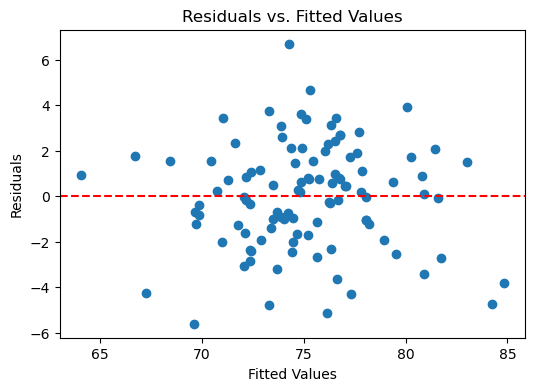

In [46]:
# Check the assumption of Homoscedasticity
# Extract residuals and fitted values
residuals_2 = model_2.resid
fitted_values_2 = model_2.fittedvalues

# Plot the residuals against the fitted values
plt.figure(figsize=(6, 4))
plt.scatter(fitted_values_2, residuals_2)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

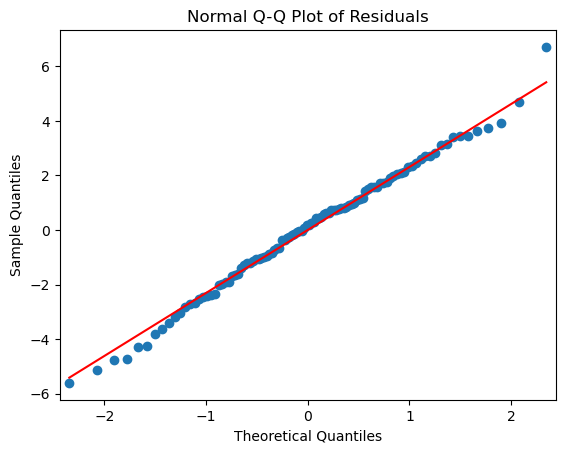

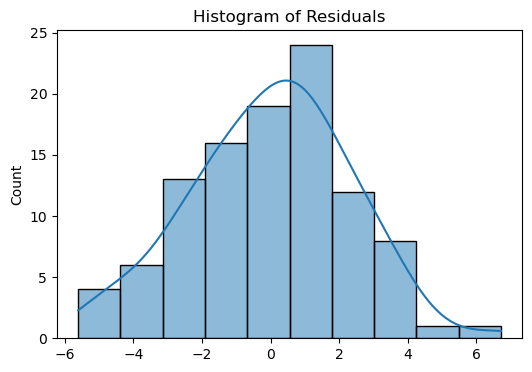

In [47]:
# Check the Normality assumption using QQ plot
sm.qqplot(residuals_2, line ='s')
plt.title('Normal Q-Q Plot of Residuals')

# Check the Normality assumption using histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals_2, kde=True)
plt.title('Histogram of Residuals')
plt.show()

**Comment**:
- The scatter plot of residuals versus fitted values shows a random pattern, indicating that the residuals are homoscedastic.
- The QQ plot shows that the residuals are approximately normally distributed, further supporting our assumption of normality.
- The histogram of residuals also appears to be approximately normally distributed, with a slight skew.
- Overall, the above plots provide evidence that the residuals are homoscedastic and follow a normal distribution, which affirms our confidence in the adjusted model's validity.


### Question 5: Do environmental factors such as state affect Koala’s physical characteristics?

To address this question, we have chosen to use independent t-tests to compare each physical characteristic between the two states (QLD and VIC). This approach is appropriate for several reasons. 
- Firstly, it allows us to compare each physical characteristic between koalas from Queensland (QLD) and Victoria (VIC).
- Secondly, The t-test is well-suited for our analysis as it can determine if there are statistically significant differences in the mean values of continuous variables (physical characteristics) between two independent samples (habitats). 


We can formulate the following hypotheses:
- Null hypothesis (H0): There is no significant difference in the mean [`physical characteristic`] between koalas from Queensland (QLD) and Victoria (VIC).
- Alternative hypothesis (H1): There is a significant difference in the mean [`physical characteristic`] between koalas from Queensland (QLD) and Victoria (VIC).

In [48]:
koalas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   koala_id             104 non-null    int64   
 1   region               104 non-null    int64   
 2   habitat              104 non-null    object  
 3   gender               104 non-null    object  
 4   age_in_years         104 non-null    float64 
 5   paw_size             104 non-null    float64 
 6   total_length         104 non-null    float64 
 7   head_length          104 non-null    float64 
 8   ear_size             104 non-null    float64 
 9   foot_length          104 non-null    float64 
 10  skull_width          104 non-null    float64 
 11  eye_diameter         104 non-null    float64 
 12  chest_circumference  104 non-null    float64 
 13  belly_circumference  104 non-null    float64 
 14  head_body_ratio      104 non-null    float64 
 15  foot_body_ratio      10

In [49]:
# Value counts of "state" (habitat)
koalas['habitat'].value_counts()


habitat
QLD    58
VIC    46
Name: count, dtype: int64

In [50]:
# Define the characteristics to test
characteristics = ['total_length', 'head_length', 'skull_width', 'foot_length', 'paw_size', 'chest_circumference', 'belly_circumference', 'eye_diameter', 'ear_size']

# Create a list to store t-test results
t_test_results = []

# Set the significance level of 5%
alpha = 0.05

# Perform t-tests
for char in characteristics:
    qld_data = koalas[koalas['habitat'] == 'QLD'][char]
    vic_data = koalas[koalas['habitat'] == 'VIC'][char]
    t_stat, p_val = stats.ttest_ind(qld_data, vic_data)
    t_test_results.append({
        'Characteristic': char,
        'T-statistic': f'{t_stat:.3f}',
        'P-value': f'{p_val:.3f}',
        'Statistically significant': 'Yes' if p_val < alpha else 'No'
    })

# Create a dataframe of the results
t_test_df = pd.DataFrame(t_test_results)

# Display the results
print("Independent T-Test results:")
print(t_test_df)

Independent T-Test results:
        Characteristic T-statistic P-value Statistically significant
0         total_length      -0.797   0.427                        No
1          head_length      -0.076   0.940                        No
2          skull_width      -0.129   0.898                        No
3          foot_length     -12.902   0.000                       Yes
4             paw_size       5.690   0.000                       Yes
5  chest_circumference      -2.007   0.047                       Yes
6  belly_circumference      -0.266   0.791                        No
7         eye_diameter       1.281   0.203                        No
8             ear_size     -18.775   0.000                       Yes


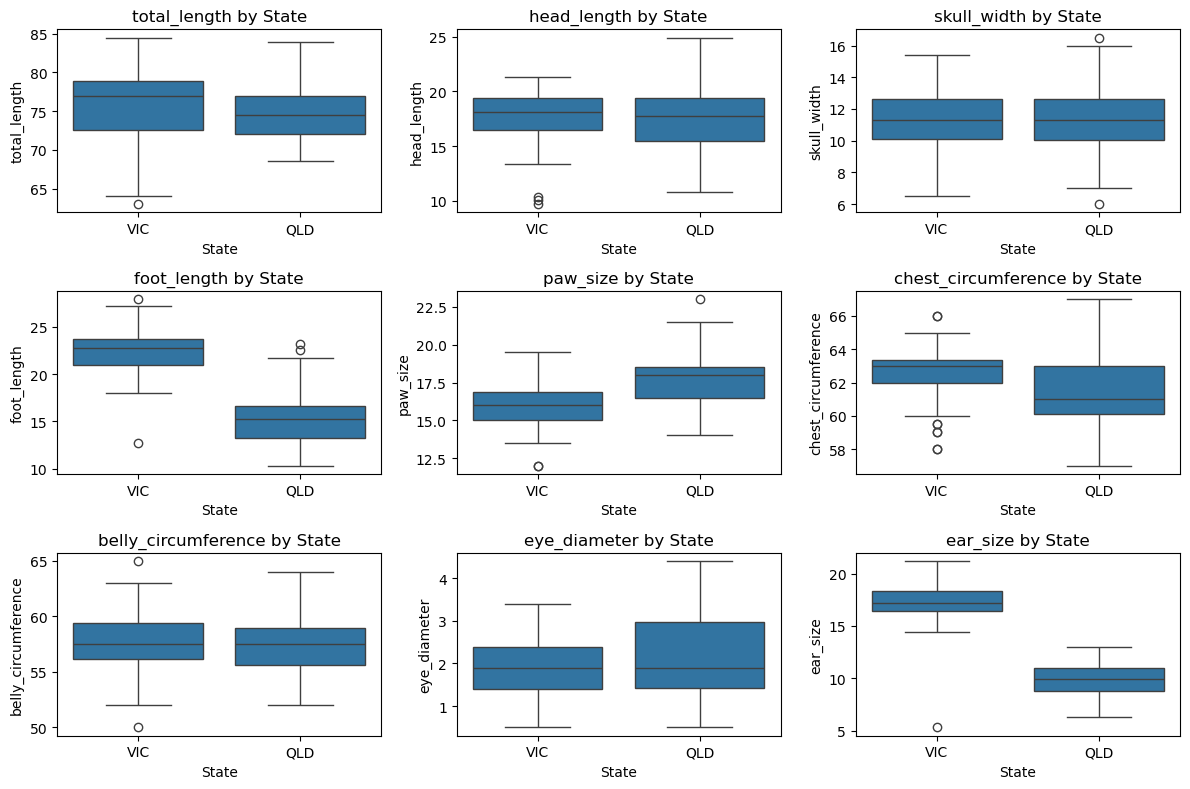

In [51]:
# Build box plots for each physical characteristic by State (QLD and VIC)
plt.figure(figsize=(12, 8))
for i, char in enumerate(characteristics, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='habitat', y=char, data=koalas)
    plt.xlabel('State')
    plt.ylabel(char)
    plt.title(f'{char} by State')
plt.tight_layout()
plt.show()

**Comment:**
Based on our analysis, we found that several physical characteristics of koalas show statistically significant differences between Queensland (QLD) and Victoria (VIC) habitats. 

- Foot length, paw size, chest circumference, and ear size all demonstrated significant variations between the two states. These variations are clearly visible in the box plots, which show distinct differences between QLD and VIC koalas for these traits. Notably, VIC koalas tend to have longer feet and larger ears, while QLD koalas have larger paws. Chest circumference, although statistically significant, shows a difference with a bit of overlap between the two groups.
- On the other hand, total length, head length, skull width, belly circumference, and eye diameter do not show statistically significant differences between QLD and VIC koalas. The box plots for these characteristics demonstrate the significant overlap between the two groups, which supports the t-test results and suggests that these traits are more consistent across the two habitats.
- The findings suggest that the physical characteristics of koalas are influenced by environmental factors in their habitats. The variations in foot length, paw size, and ear size could be adaptations to specific environmental conditions or food sources in each habitat. For instance, differences in vegetation or terrain might explain the variations in foot and paw characteristics, while climatic factors could affect ear size.
- However, it is essential to note that while we have observed habitat-related differences, other factors may also contribute to shaping the physical characteristics of koalas. Genetic variation within populations, differences in local diets, and human interventions in different regions could all play a role in these variations. Furthermore, the consistency in overall body size and head length across habitats suggests that some traits may be more genetically conserved or less impacted by environmental factors.

In short, this analysis provides evidence that environmental factors associated with different habitats (QLD versus VIC) do affect certain physical characteristics of koalas, particularly those related to extremities and sensory organs. 

### Question 6: What factors are correlated with the total length of a Koala?

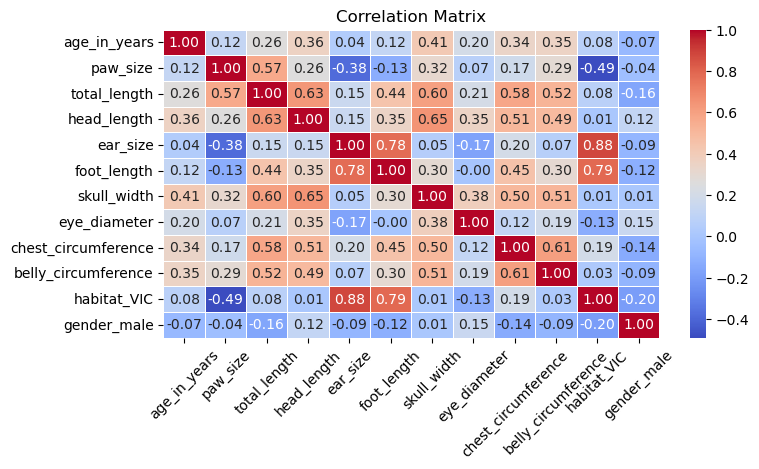

In [52]:
# Drop factors that are not related to the total length of a Koala and newly created variables used in previous questions
# We will not use 'region' because of limited information about it
koalas_cleaned = koalas.drop(columns = ['koala_id', 'region', 'head_body_ratio', 'foot_body_ratio', 'age_group', 'belly_chest_ratio'])

# Create dummy variables for categorical variables 'habitat' and 'gender'
koalas_cleaned = pd.get_dummies(koalas_cleaned, columns=['habitat', 'gender'], drop_first=True)

# Convert all boolean columns to integers
bool_columns = koalas_cleaned.select_dtypes(include=['bool']).columns
for col in bool_columns:
    koalas_cleaned[col] = koalas_cleaned[col].astype(int)

# Compute the correlation matrix
correlation_matrix = koalas_cleaned.corr()

# Display the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

**Comment:**
- The correlation matrix reveals moderate to strong positive correlations between total length and several physical characteristics, with head length (0.63), skull width (0.60), and chest circumference (0.58) showing the strongest relationships. This suggests that these features are good indicators of a koala's overall size. 
- Noticeably, foot length and ear size, which show significant differences between habitats in our previous analysis, have weaker correlations with total length (0.44 and 0.15, respectively). This indicates that while these features may vary by habitat, they are not strongly predictive of a koala's total length.
- Age shows a weak positive correlation (0.26) with total length, while gender and habitat (VIC) have minimal correlation (-0.16 and 0.08, respectively).

                 Factor  Correlation P-value Statistically significant
0           head_length     0.634559   0.000                       Yes
1           skull_width     0.602056   0.000                       Yes
2   chest_circumference     0.577890   0.000                       Yes
3              paw_size     0.565646   0.000                       Yes
4   belly_circumference     0.518741   0.000                       Yes
5           foot_length     0.443706   0.000                       Yes
6          age_in_years     0.264556   0.007                       Yes
7          eye_diameter     0.205051   0.037                       Yes
8              ear_size     0.153644   0.119                        No
9           habitat_VIC     0.078666   0.427                        No
10          gender_male    -0.160200   0.104                        No


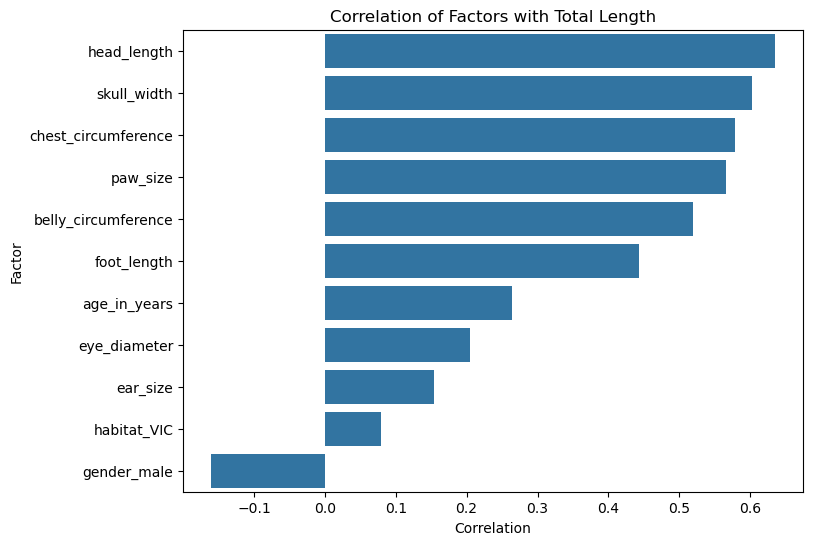

In [53]:
# Get all factors excluding total_length
factors = [col for col in koalas_cleaned.columns if col != 'total_length']

# Set significance level of 5%
alpha = 0.05

# Perform Pearson correlation test for each factor versus total_length
results = []
for factor in factors:
    corr, p_val = stats.pearsonr(koalas_cleaned['total_length'], koalas_cleaned[factor])
    results.append({'Factor': factor, 
                    'Correlation': corr, 
                    'P-value': f'{p_val:.3f}', 
                    'Statistically significant': 'Yes' if p_val < alpha else 'No'})
    
# Convert results to dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Correlation', ascending=False)
# Reset index
results_df = results_df.reset_index(drop=True)

# Display results
print(results_df)

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.barplot(x='Correlation', y='Factor', data=results_df)
plt.title('Correlation of Factors with Total Length')
plt.show()

**Comment:**
We employ the Pearson correlation test results to validate and refine our understanding of the factors correlated with koala total length. 
- The test confirms that head length, skull width, chest circumference, paw size, and belly circumference are all strongly and significantly correlated with total length (p < 0.05). 
- Foot length also shows a significant moderate correlation. While age demonstrates a weak but significant correlation (p = 0.007), eye diameter's correlation is barely significant (p = 0.037), suggesting a possible but not robust relationship. 
- Moreover, the test reveals that ear size, habitat, and gender do not have statistically significant correlations with total length, despite previous observations of habitat-based differences in some of these features. 

## Section 4: Recommendations

- Our thorough analysis of koala physical traits has uncovered important findings for conservation efforts. We have identified strong correlations between the total length and measurements such as head length, skull width, and chest circumference, which serve as reliable indicators of the overall size of koalas. It is worth noting that we have observed significant regional differences between Queensland and Victorian koalas, especially in foot length, paw size, and ear size, indicating adaptations to local environments. 

- Gender differences in koalas are subtle but noticeable in body proportions. Female koalas have slightly higher foot-to-body ratios and greater variability in belly circumference, which may be linked to reproductive stages. It is necessary to note that certain traits like foot length and ear size vary based on habitat, but these traits do not strongly correlate with total body length. This suggests that there are complex interactions between the koalas' environment and their physiology.

- These findings have important implications for conservation strategies. We suggest the development of standardized health assessment tools that are based on the strong correlations between body measurements. For instance, wildlife researchers could create a standardized index based on head length, skull width, and chest circumference to estimate a koala's overall body condition without invasive procedures. This would enable more efficient and less stressful health monitoring of wild populations.

- Given the state variations, we recommend implementing conservation plans tailored to specific habitats. These plans should take into consideration local adaptations and could be used to guide focused habitat restoration efforts. To preserve genetic diversity, we propose establishing interconnected wildlife reserves or so-called "green bridges" between distant populations, with a particular focus on linking Queensland and Victoria. This could include creating protected areas that connect isolated koala habitats.

- Moreover, gender differences and variations in female measurements might provide an opportunity to develop gender-specific approaches. For instance, studying the variability in female belly circumference could lead to non-invasive methods for assessing reproductive status, which would be valuable for population management. Lastly, we recommend initiating long-term studies investigating how these physical traits might impact koalas' resilience to climate change. This research could provide crucial insights for developing adaptive conservation strategies for koalas.

- By implementing these data-driven approaches, we can enhance the effectiveness of koala conservation efforts and ensure the long-term survival of this iconic species in the Australian ecosystem.